# Dataset de Automóviles (Automobile)

El dataset **“Automobile”** reúne información técnica y de seguros de **205 vehículos** de distintas marcas y modelos, extraída del _Ward's Automotive Yearbook_ de 1985 y donada al repositorio de **UCI Machine Learning** en 1987.

El objetivo principal es predecir el **precio de venta** de los automóviles y evaluar su **riesgo de seguro**, lo que lo convierte en un recurso útil tanto para tareas de **regresión** como de **clasificación**. Además, debido a la presencia de valores faltantes en varios atributos clave, es un conjunto ideal para **ejercicios de limpieza y preprocesamiento de datos**.

El dataset contiene **26 atributos** que abarcan información del fabricante, características técnicas, dimensiones, especificaciones del motor, consumo de combustible y variables de riesgo.

|     **Atributo**      | **Descripción**                                                                      |
| :-------------------: | :----------------------------------------------------------------------------------- |
|     **symboling**     | Clasificación de riesgo de seguro (-3 = muy seguro, 0 = promedio, +3 = muy riesgoso) |
| **normalized-losses** | Pérdidas normalizadas por categoría de tamaño (65 – 256, con valores faltantes)      |
|       **make**        | Marca del vehículo (ej: alfa-romero, audi, bmw, honda, tochota, volkswagen, etc.)     |
|     **fuel-type**     | Tipo de combustible: `gas` (gasolina) o `diesel`                                     |
|    **aspiration**     | Sistema de admisión: `std` (natural) o `turbo` (turboalimentado)                     |
|   **num-of-doors**    | Número de puertas: `two` o `four` (con valores faltantes)                            |
|    **body-style**     | Estilo de carrocería: sedan, hatchback, wagon, hardtop, convertible                  |
|   **drive-wheels**    | Tipo de tracción: `fwd` (delantera), `rwd` (trasera), `4wd` (4x4)                    |
|  **engine-location**  | Ubicación del motor: delantero o trasero                                             |
|    **wheel-base**     | Distancia entre ejes (86.6 – 120.9 pulgadas)                                         |
|      **length**       | Longitud total del vehículo (141.1 – 208.1 pulgadas)                                 |
|       **width**       | Anchura del vehículo (60.3 – 72.3 pulgadas)                                          |
|      **height**       | Altura del vehículo (47.8 – 59.8 pulgadas)                                           |
|    **curb-weight**    | Peso en vacío del vehículo (1,488 – 4,066 lbs)                                       |
|    **engine-type**    | Tipo de motor (`ohc`, `ohcf`, `dohc`, `rotor`, etc.)                                 |
| **num-of-cylinders**  | Número de cilindros (three, four, five, six, eight, twelve, etc.)                    |
|    **engine-size**    | Tamaño del motor en cc (61 – 326)                                                    |
|    **fuel-system**    | Sistema de inyección/combustible (`mpfi`, `2bbl`, `mfi`, `idi`, etc.)                |
|       **bore**        | Diámetro del cilindro (2.54 – 3.94 pulgadas, con valores faltantes)                  |
|      **stroke**       | Carrera del pistón (2.07 – 4.17 pulgadas, con valores faltantes)                     |
| **compression-ratio** | Relación de compresión (7 – 23)                                                      |
|    **horsepower**     | Potencia en caballos de fuerza (48 – 288, con valores faltantes)                     |
|     **peak-rpm**      | Revoluciones máximas por minuto (4,150 – 6,600, con valores faltantes)               |
|     **city-mpg**      | Consumo de combustible en ciudad (13 – 49 mpg)                                       |
|    **highway-mpg**    | Consumo de combustible en carretera (16 – 54 mpg)                                    |
| **price** _(Target)_  | Precio de venta del vehículo en dólares (5,118 – 45,400 USD, con valores faltantes)  |

In [23]:
DATOS_DIR = "./datos/"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(DATOS_DIR + 'automobile.csv')

## Ejercicio 9

Realice un análisis sobre los valores de los atributos del dataset automobile.csv. Para cada atributo que no pueda ser procesado directamente, indique que problema tiene (valores nulos o vacíos, valores categóricos, valores atípicos o outliers, etc.) y como solucionarlo.

In [24]:
# print(data.isnull().sum()) # No hay valores nulos
# print((data == '?').sum()) # Hay valores faltantes representados con '?'

# print(data["make"].value_counts())
print(data["engine-type"].value_counts())
# print(data["fuel-system"].value_counts())

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


normalized-losses -> 41 valores faltantes. Se utiliza la media para reemplazarlos.

para el resto -> se eliminan.

## Ejercicio 10

Dada la siguiente tabla con mediciones de 2 características correspondientes a mediciones de altura y peso de personas:

<div style="display: flex; justify-content: center;">
  <table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; text-align: center;">
    <tbody>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Altura</td>
		<td>1.65</td> <td>1.81</td> <td>1.70</td> <td>1.62</td> <td>1.74</td> <td>1.70</td> <td>1.80</td> <td>1.73</td> <td>1.68</td>
      </tr>
      <tr>
        <td style="background-color:#2E86C1; color:white;">Peso</td>
        <td>75</td> <td>86</td> <td>82</td> <td>78</td> <td>77</td> <td>87</td> <td>90</td> <td>83</td> <td>80</td>
      </tr>
    </tbody>
  </table>
</div>

### a) Aplique las siguientes normalizaciones y grafíquelas con un diagrama de caja:

$$
MinMax: \frac{x_{i}-min(x)}{max(x)- min(x)}\quad\quad\quad\quad Standard: \frac{x_{i} - media(x)}{stddev(x)} \quad\quad\quad\quad Robust: \frac{x_{i} - Q1(x)}{Q3(x)-Q1(x)}
$$

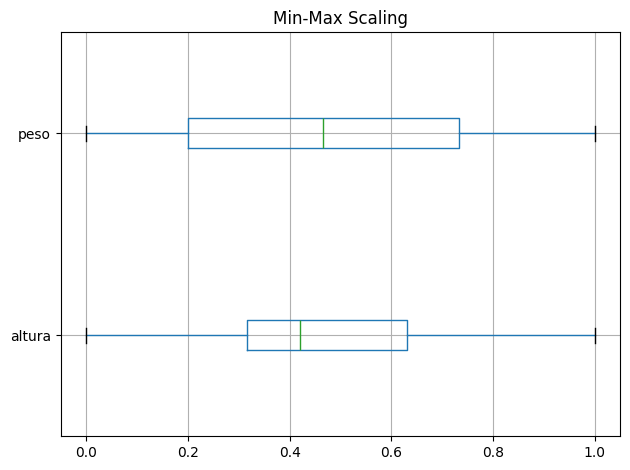

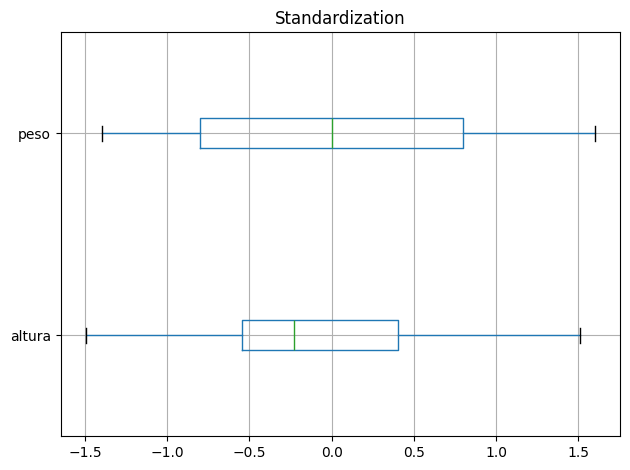

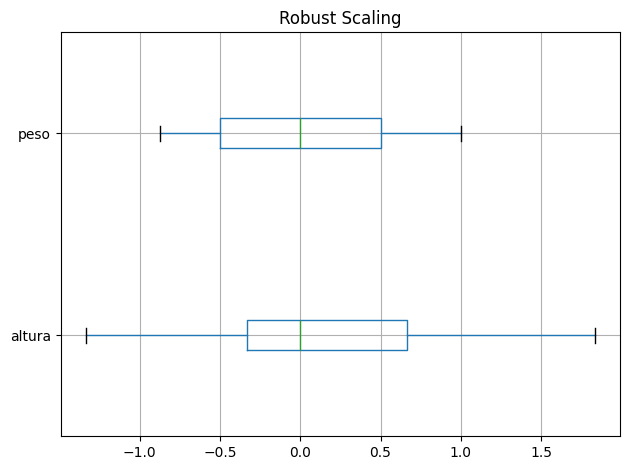

In [30]:
data = pd.DataFrame(
    {
		"altura": [1.65, 1.81, 1.7, 1.62, 1.74, 1.7, 1.8, 1.73, 1.68],
		"peso": [75, 86, 82, 78, 77, 87, 90, 83, 80]
	}
)

min_max = (data - data.min()) / (data.max() - data.min())
min_max.boxplot(vert=False)
plt.title("Min-Max Scaling")
plt.tight_layout()
plt.show()

standardized = (data - data.mean()) / data.std()
standardized.boxplot(vert=False)
plt.title("Standardization")
plt.tight_layout()
plt.show()

robust = (data - data.median()) / (data.quantile(0.75) - data.quantile(0.25))
robust.boxplot(vert=False)
plt.title("Robust Scaling")
plt.tight_layout()
plt.show()

### b) Agregue la siguiente medición (2.20, 120) y repita el punto a)

In [ ]:
row = pd.DataFrame({"altura": [2.20], "peso": [120]})
data = pd.concat([data, row], ignore_index=True)

min_max = (data - data.min()) / (data.max() - data.min())
min_max.boxplot(vert=False)
plt.title("Min-Max Scaling")
plt.tight_layout()
plt.show()

standardized = (data - data.mean()) / data.std()
standardized.boxplot(vert=False)
plt.title("Standardization")
plt.tight_layout()
plt.show()

robust = (data - data.median()) / (data.quantile(0.75) - data.quantile(0.25))
robust.boxplot(vert=False)
plt.title("Robust Scaling")
plt.tight_layout()
plt.show()